### Indeed.ca Job Title Summary Text Frequency

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [52]:
df = pd.read_csv("sept_final_preprocessed.csv", usecols = ['job_title','company_name','summary'])

In [53]:
df.head()

job_title      company_name  \
0             summer intern data science engineering  hsbc bank canada   
1                                     student intern          skyworks   
2                              data scientist intern            geotab   
3  data engineer omnia ai co op intern winter mul...          deloitte   
4                 data science intern winter toronto            intact   

                                             summary  
0  building changing predictive analytical soluti...  
1  strong data analysis skill support pes custome...  
2  data scientist intern work alongside team fell...  
3  fascinated data structures data models data pa...  
4  currently looking interns data lab r&d departm...

In [54]:
# https://www.kaggle.com/itratrahman/nlp-tutorial-using-python analysis ideas
# top words in job title
# top words in summary by job title top words?
# top words in summary by job title top words by company?
# TF-IDF extraction? 
# ... training models etc depends on shape of top words data

# might have to do iterative process to check proportion of \n
# summary top words per job title top words per company?

#### Top Words Analysis

In [55]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()
# fit the vectorizer using the text data
tfid_vectorizer.fit(df['job_title'])
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()  

In [56]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_bef_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_bef_stem = vocab_bef_stem.sort_values(ascending=False)

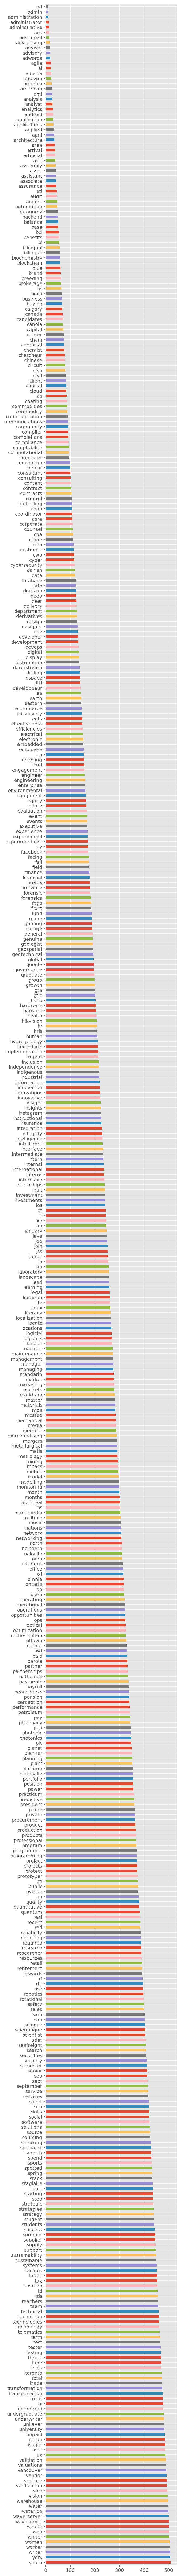

In [57]:
top_vacab = vocab_bef_stem.head(500)
top_vacab.plot(kind = 'barh', figsize=(5,100))

In [58]:
# potentially usable (high volume)
# manually curated
# not advisable with higher volume of total data, but can use something like labelling, then training a model
# then automatically filter for similar desired job title keywords... 
workable_title_vocab = ["web",
                        "ux",
                        "undergraduate",
                        "ui",
                        "testing",
                        "tester",
                        "test",
                        "technology",
                        "technologies",
                        "stack",
                        "software",
                        "scientist",
                        "researcher",
                        "research",
                        "quantitative",
                        "quality",
                        "qa",
                        "python",
                        "prototyper",
                        "programming",
                        "programmer",
                        "program",
                        "predictive",
                        "modelling",
                        "machine",
                        "learning",
                        "java",
                        "dev",
                        "developer",
                        "deep",
                        "database",
                        "data",
                        "analytics",
                        "analyst",
                        "analysis"
                       ]

In [59]:
import re
searchfor = workable_title_vocab
s = df.job_title.str.contains('|'.join(searchfor))
df2 = df[s]

In [60]:
len(df)

976

In [61]:
df2 = df2.reset_index(drop=True)
df2

job_title  \
0               summer intern data science engineering   
1                                data scientist intern   
2    data engineer omnia ai co op intern winter mul...   
3                   data science intern winter toronto   
4                 data insight specialist co op intern   
5                                  data analyst intern   
6                                  intern data science   
7             instructional writer data science intern   
8                          applied research lab intern   
9               business support intern data analytics   
10   analyst strategic operational risk winter inte...   
11   associate consultant intern data services univ...   
12                student intern customer data analyst   
13                    research intern toronto waterloo   
14             data scientist internship opportunities   
15                            op intern data analytics   
16                 analytics data science co op intern   
17              summer intern data science engineering   
18                      web front end developer intern   
19   associate managing consultant intern data serv...   
20                             python developer intern   
21                              genuine analyst intern   
22                                    developer intern   
23                 software developer intern bs summer   
24                        data science coop calgary ab   
25                                  programming intern   
26                     op intern blue planet analytics   
27                             intern applied research   
28                      op intern photonic development   
29                                      data scientist   
..                                                 ...   
586                  intern analyst digital innovation   
587                  intern analyst digital innovation   
588                   senior machine learning engineer   
589                  developer enterprise architecture   
590                                 software developer   
591  enterprise enabling technology solutions devel...   
592                    embedded test software engineer   
593  intern analyst total fund management month con...   
594  automation monitoring support analyst innovati...   
595  software testing intern stagiaire en test logi...   
596  software developer intern développeur logiciel...   
597                  intern analyst digital innovation   
598                                software tester sam   
599                    op intern blue planet analytics   
600  software test intern montreal r&d center hikvi...   
601           software test intern montreal r&d center   
602                           op intern data analytics   
603  software test intern montreal r&d center hikvi...   
604           op intern photonic systems test engineer   
605           intern ecommerce java software developer   
606                           op intern data analytics   
607  user interface ui design intern stagiaire en c...   
608                                software tester sam   
609                           op intern data analytics   
610                                    tester qa month   
611  user interface ui design intern stagiaire en c...   
612                                software tester sam   
613                           op intern data analytics   
614                                    tester qa month   
615           intern ecommerce java software developer   

                       company_name  \
0                  hsbc bank canada   
1                            geotab   
2                          deloitte   
3                            intact   
4                    general motors   
5                 upfeat media inc.   
6                   rs energy group   
7                            geotab   
8               ch four biogas inc.   
9                            geotab   
10                 

In [62]:
# generate different colors for bar
# https://stackoverflow.com/questions/14720331/how-to-generate-random-colors-in-matplotlib

from itertools import cycle
cycol = cycle('bgrcmk')

In [63]:
# make bar charts of top 5 words in summary, for job title keywords
# realizing here that SQL's database v conditional join tables/columns function would be very useful...
# https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe?rq=1

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


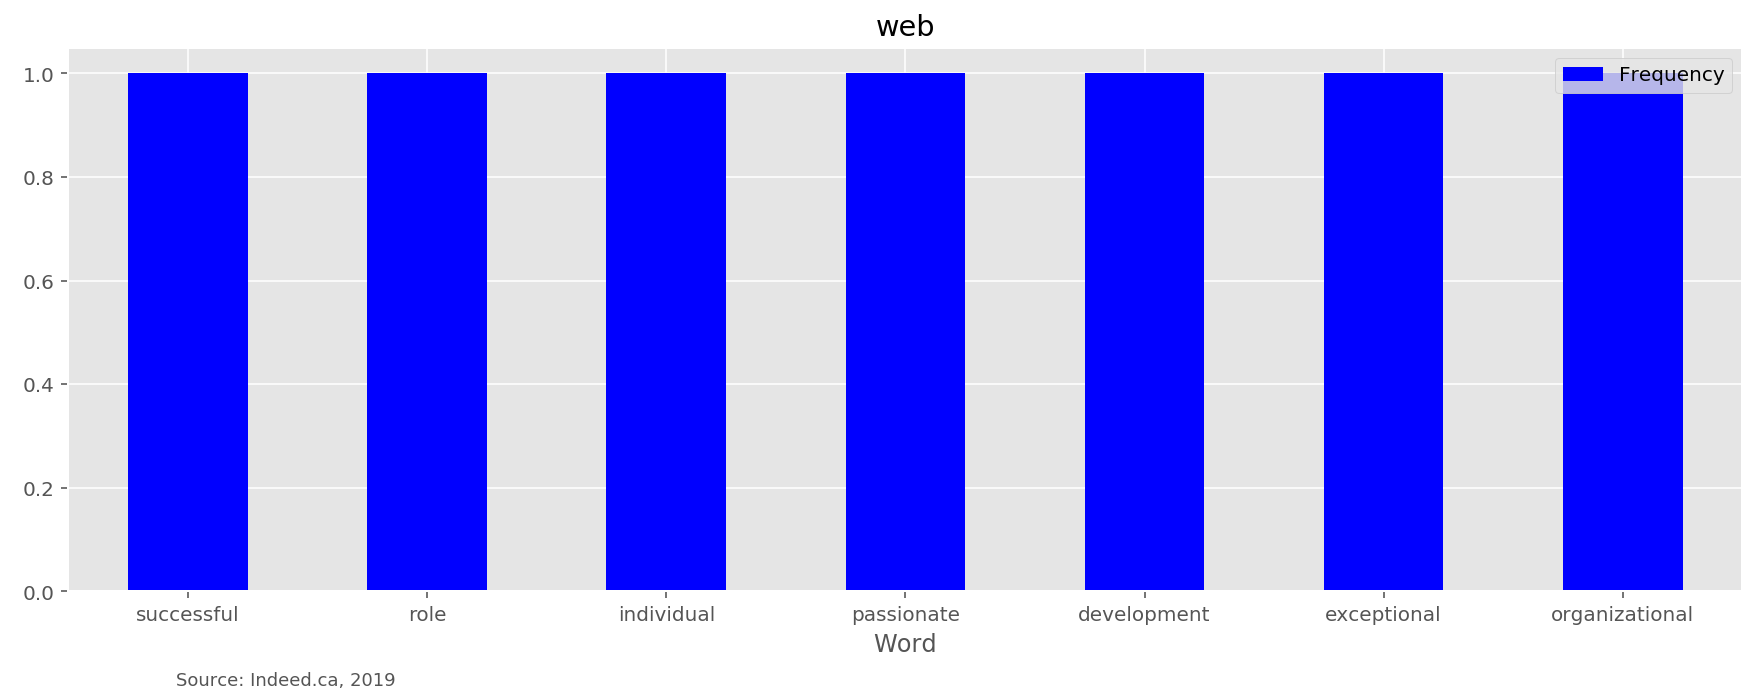

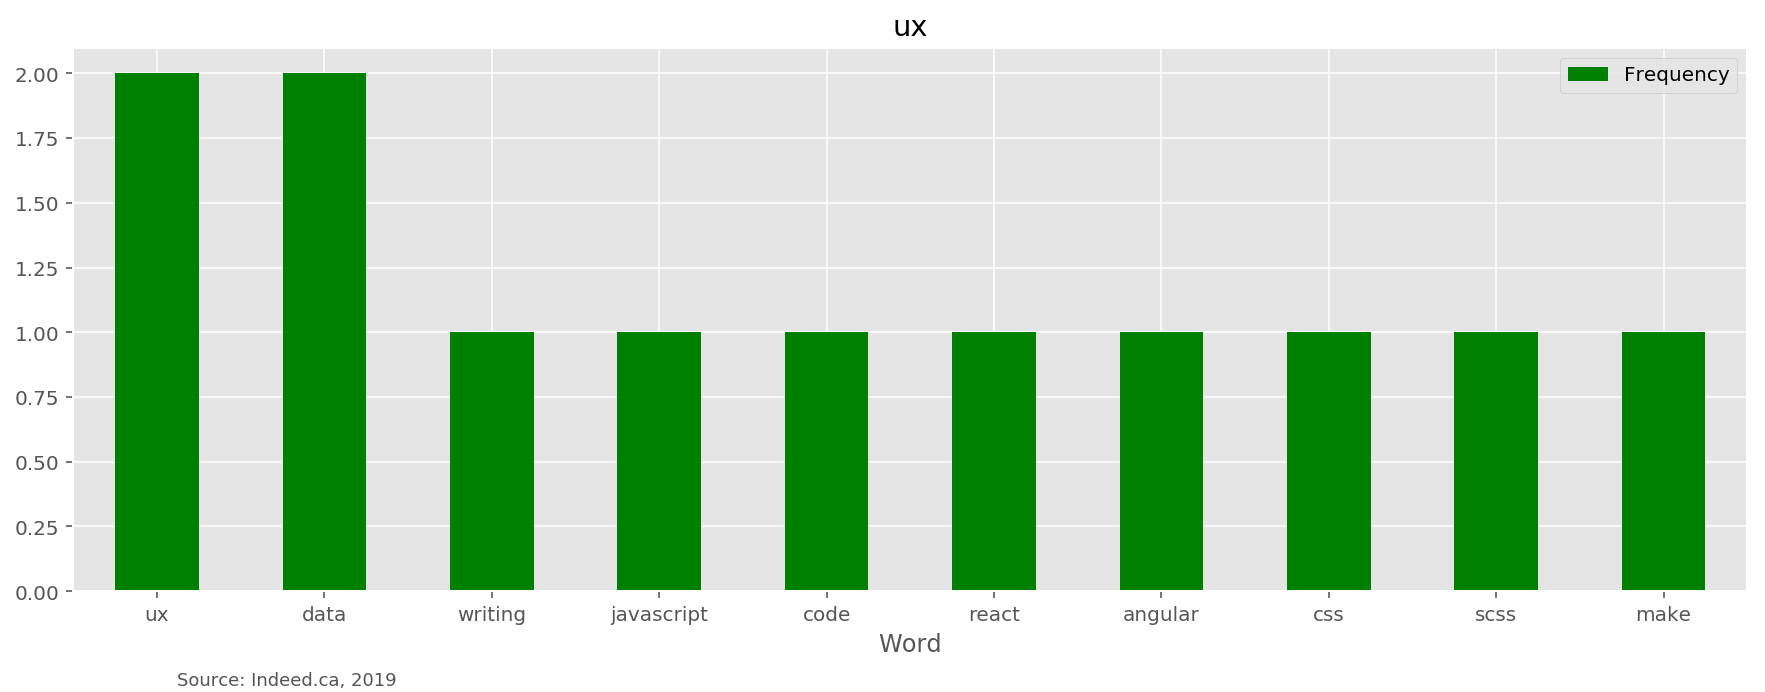

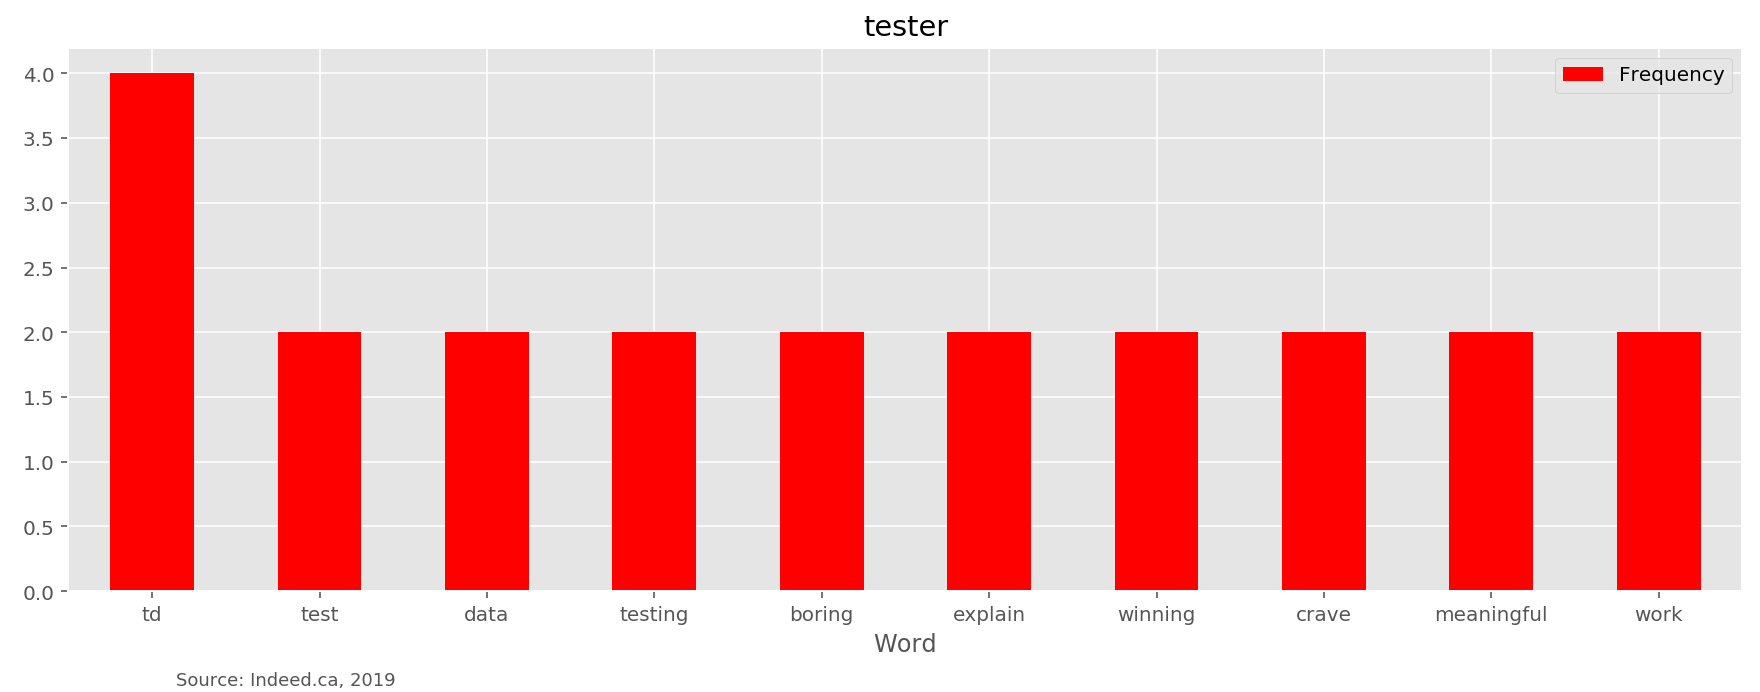

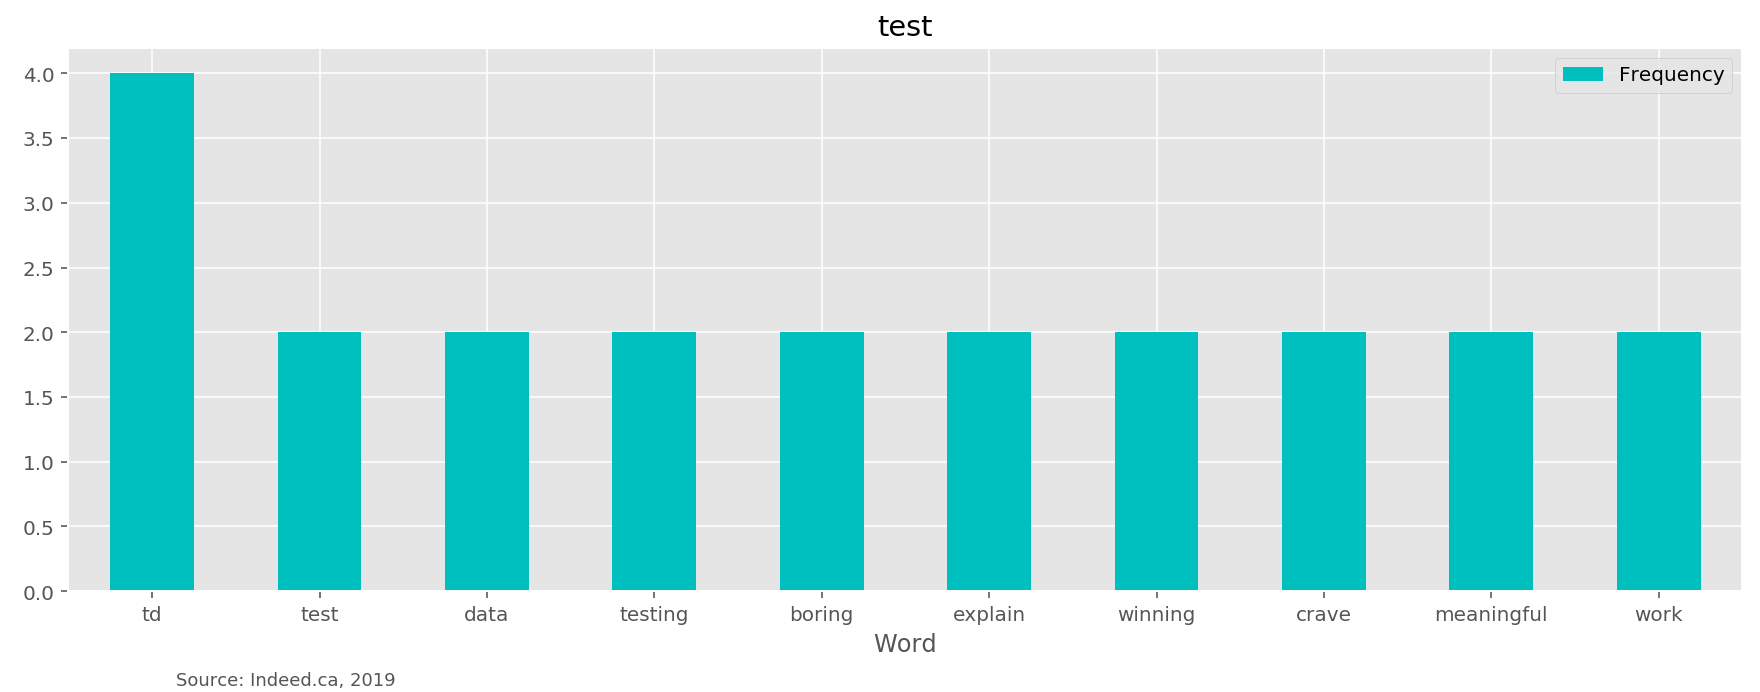

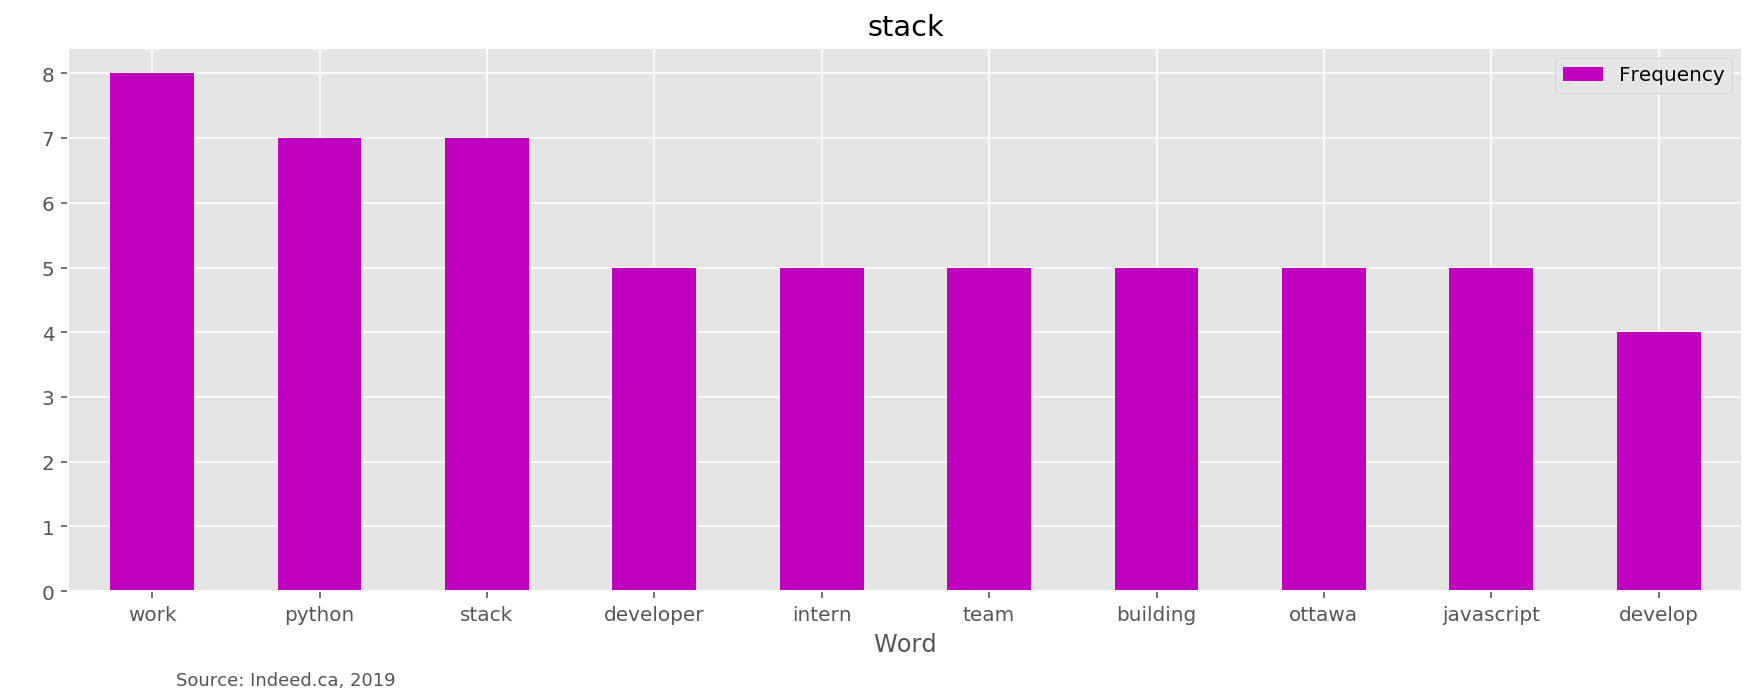

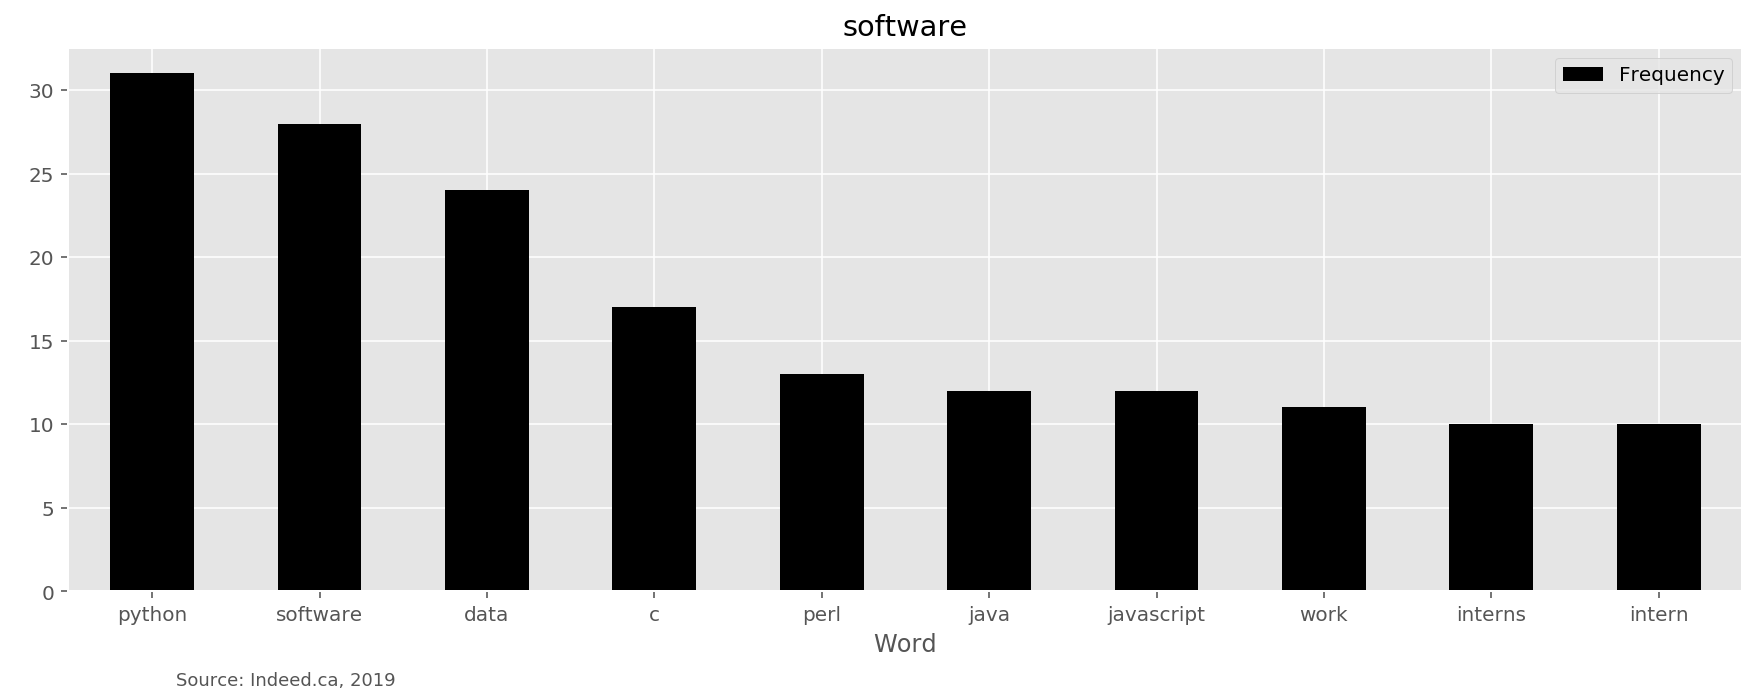

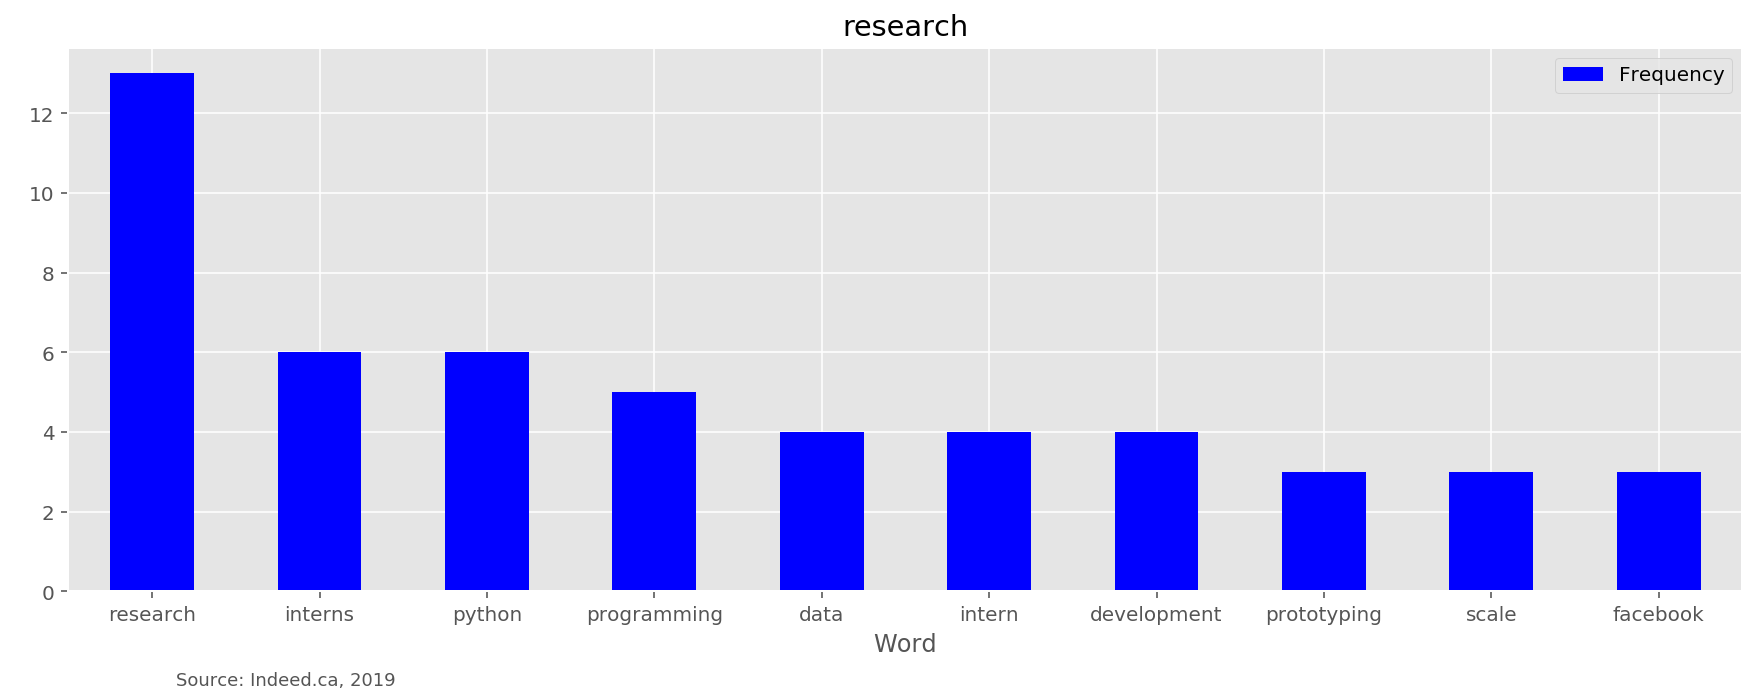

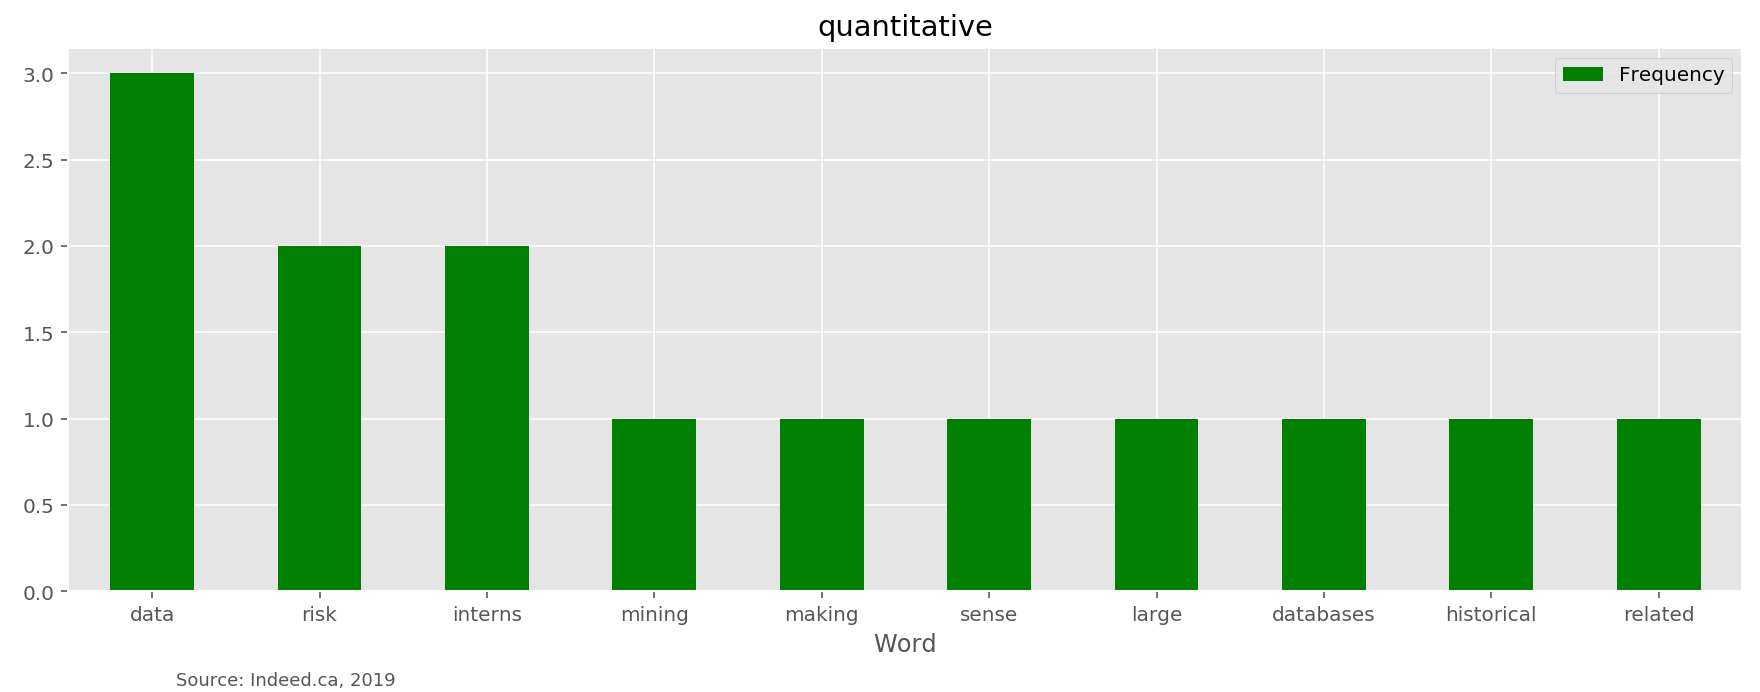

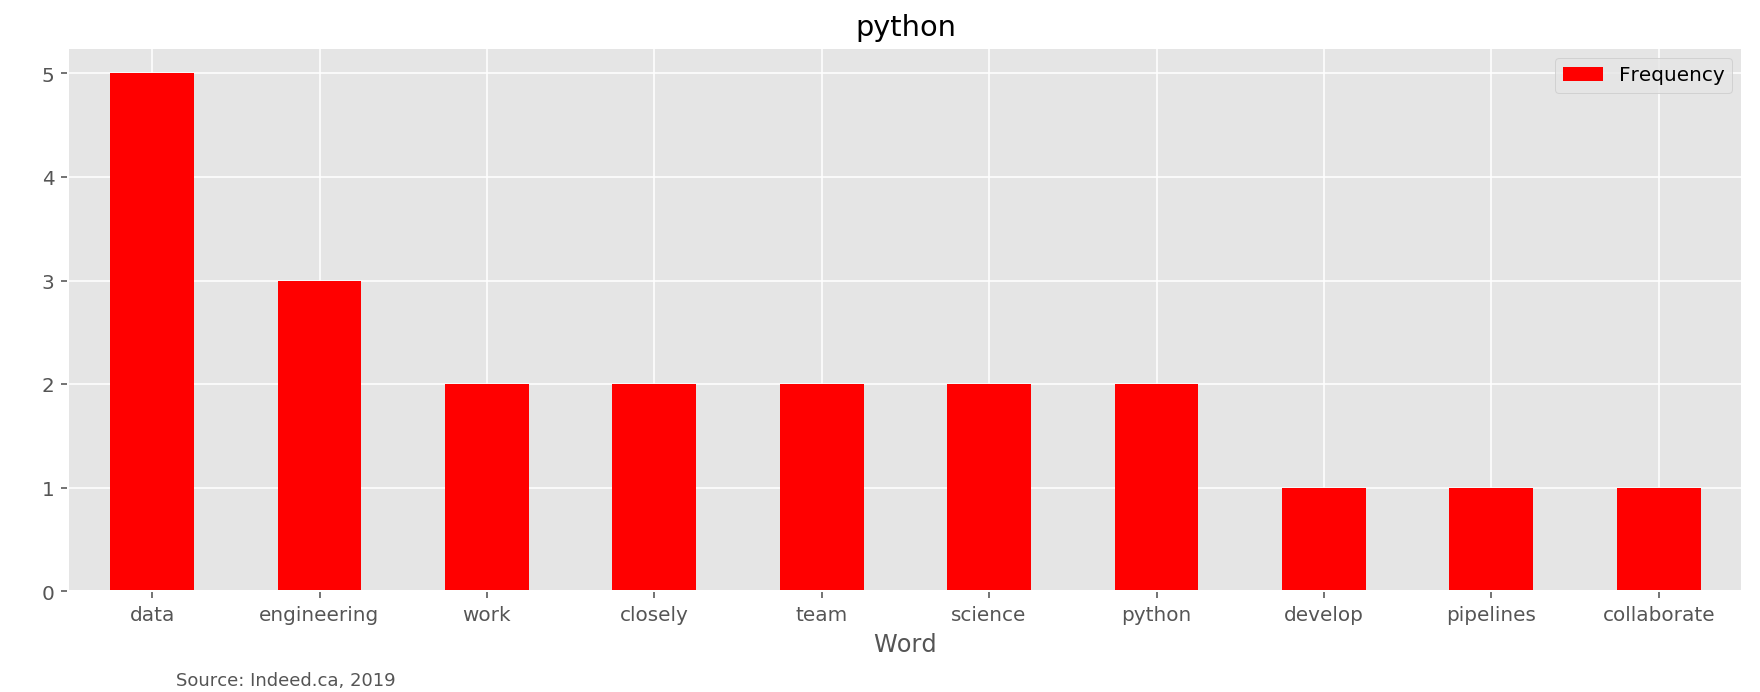

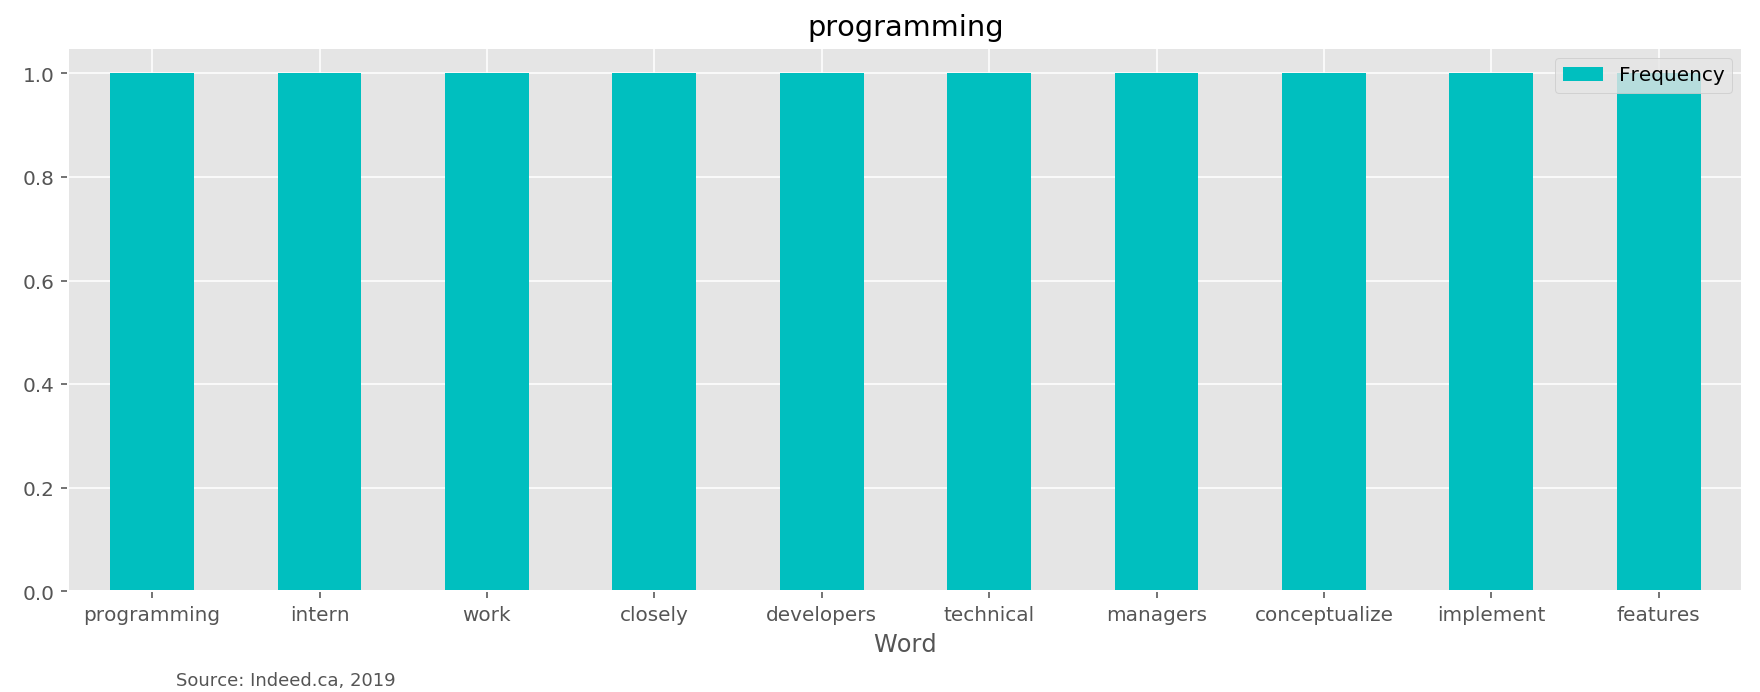

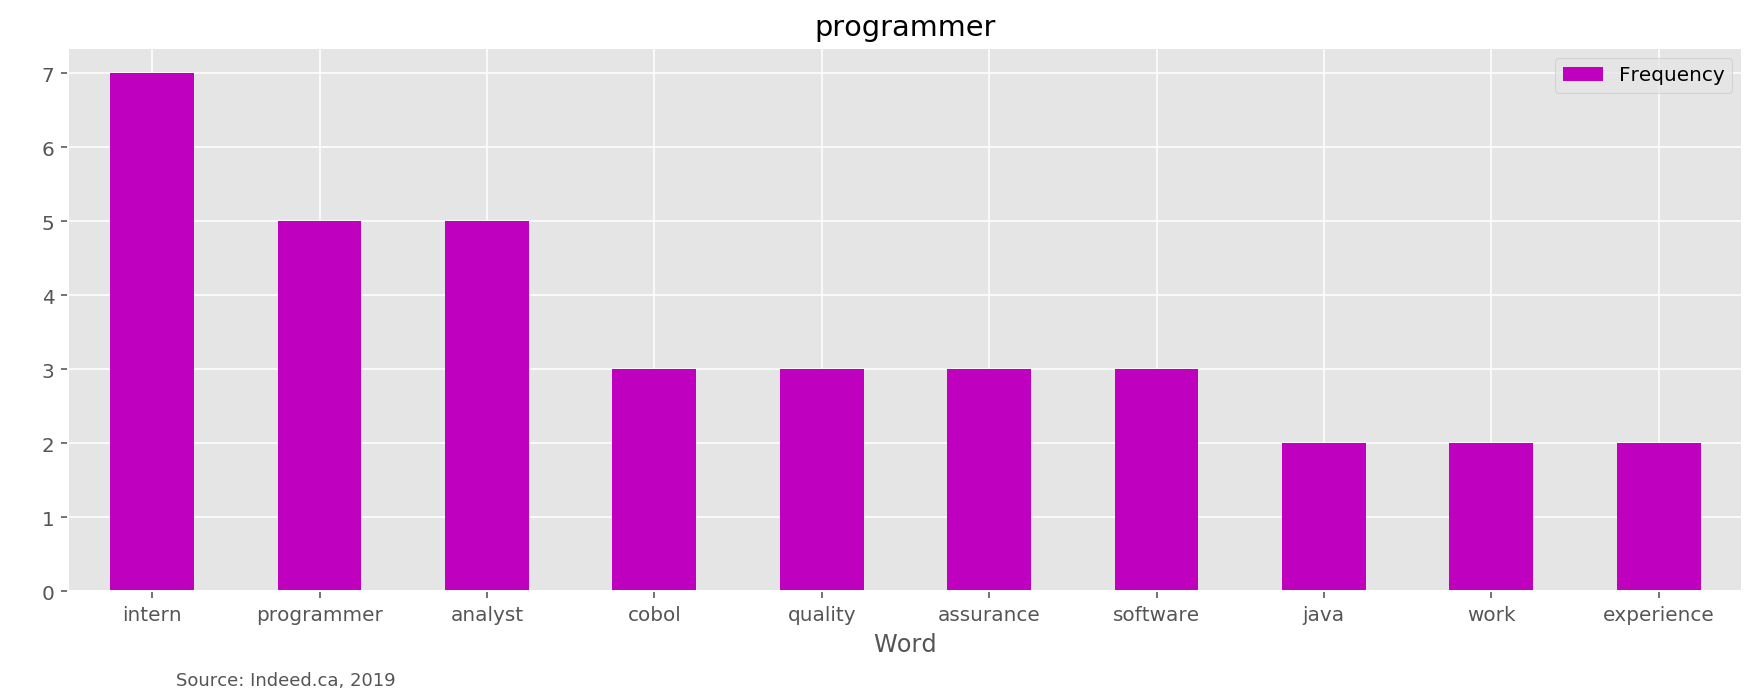

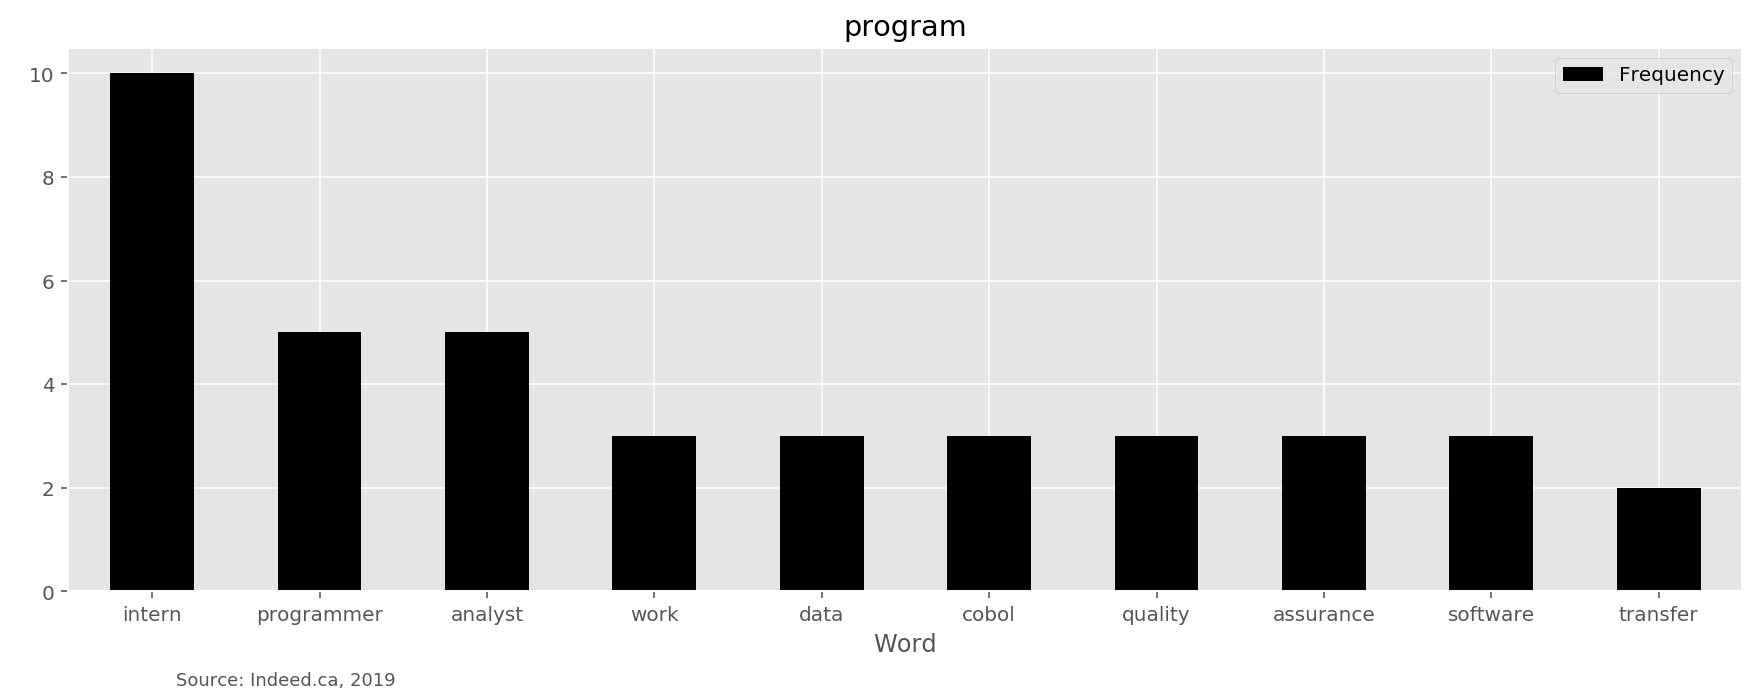

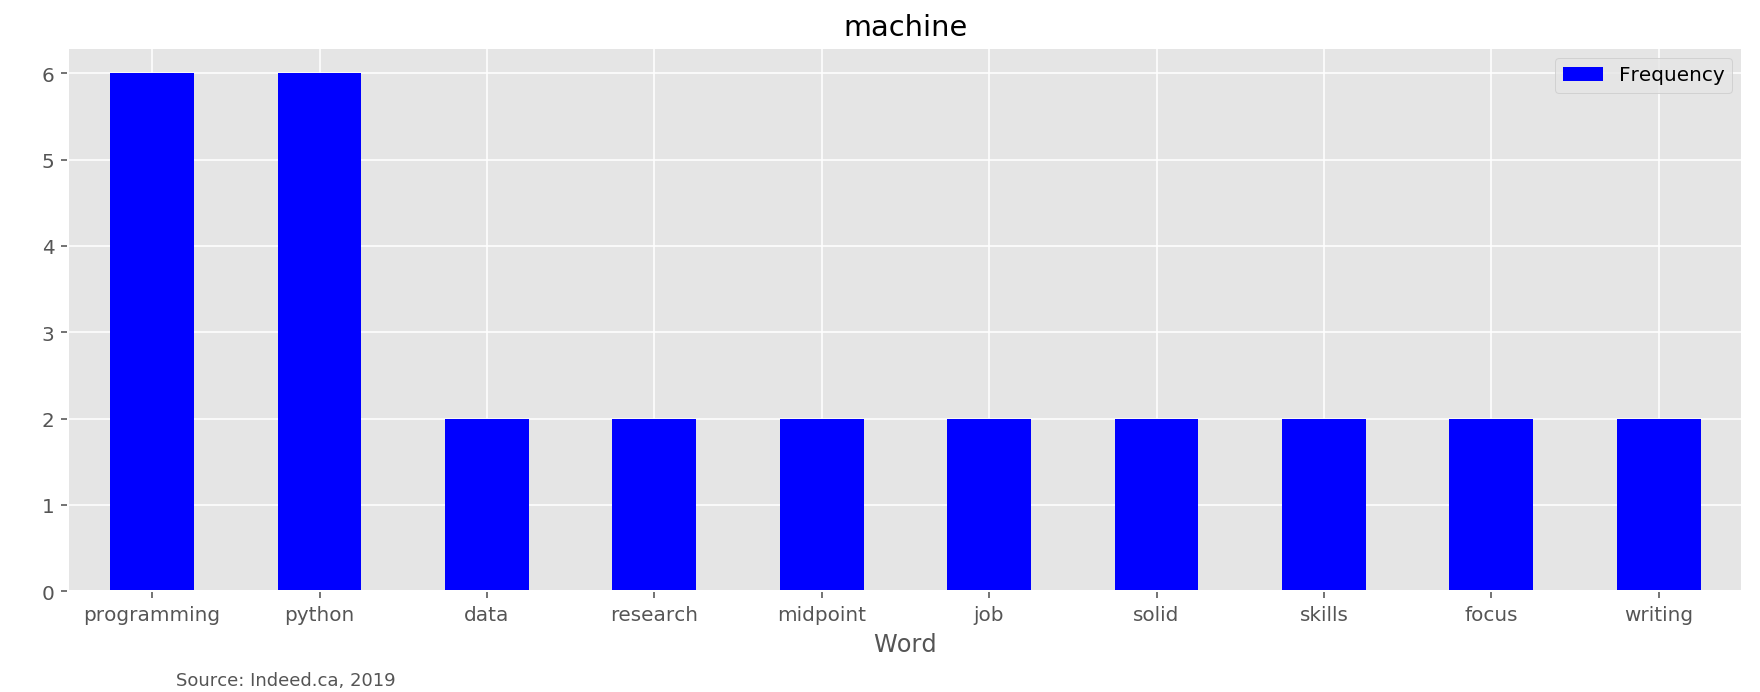

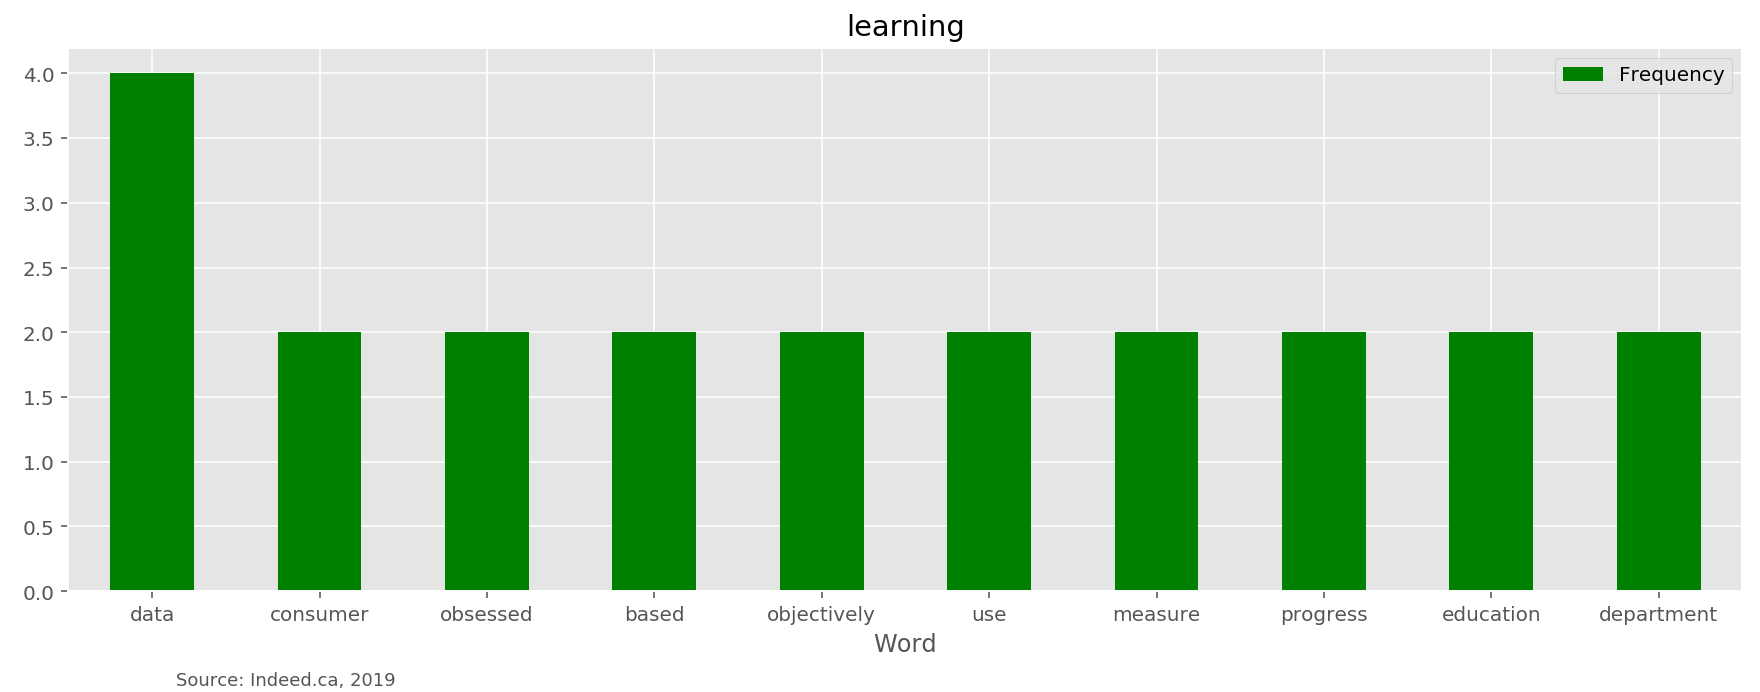

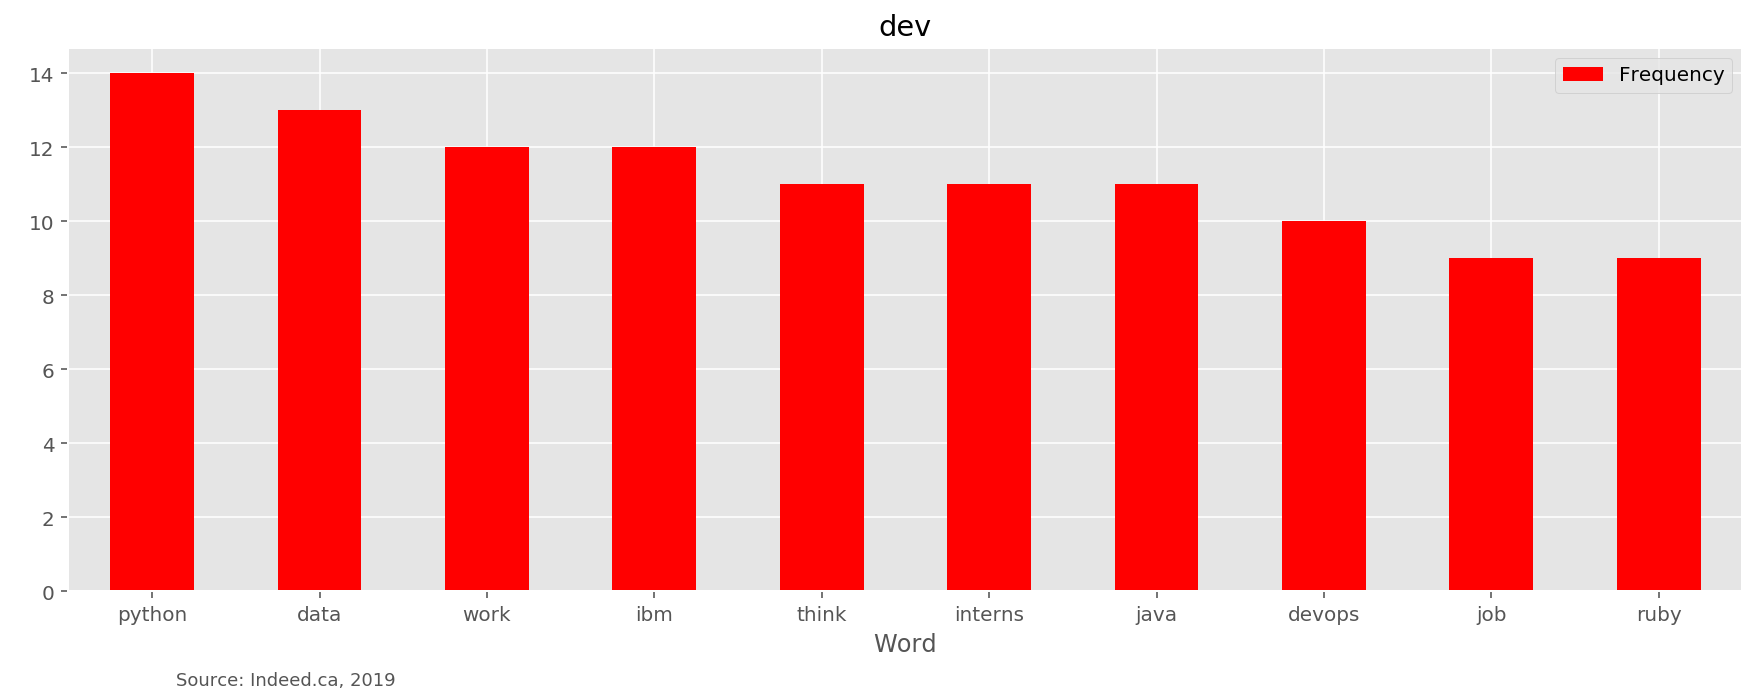

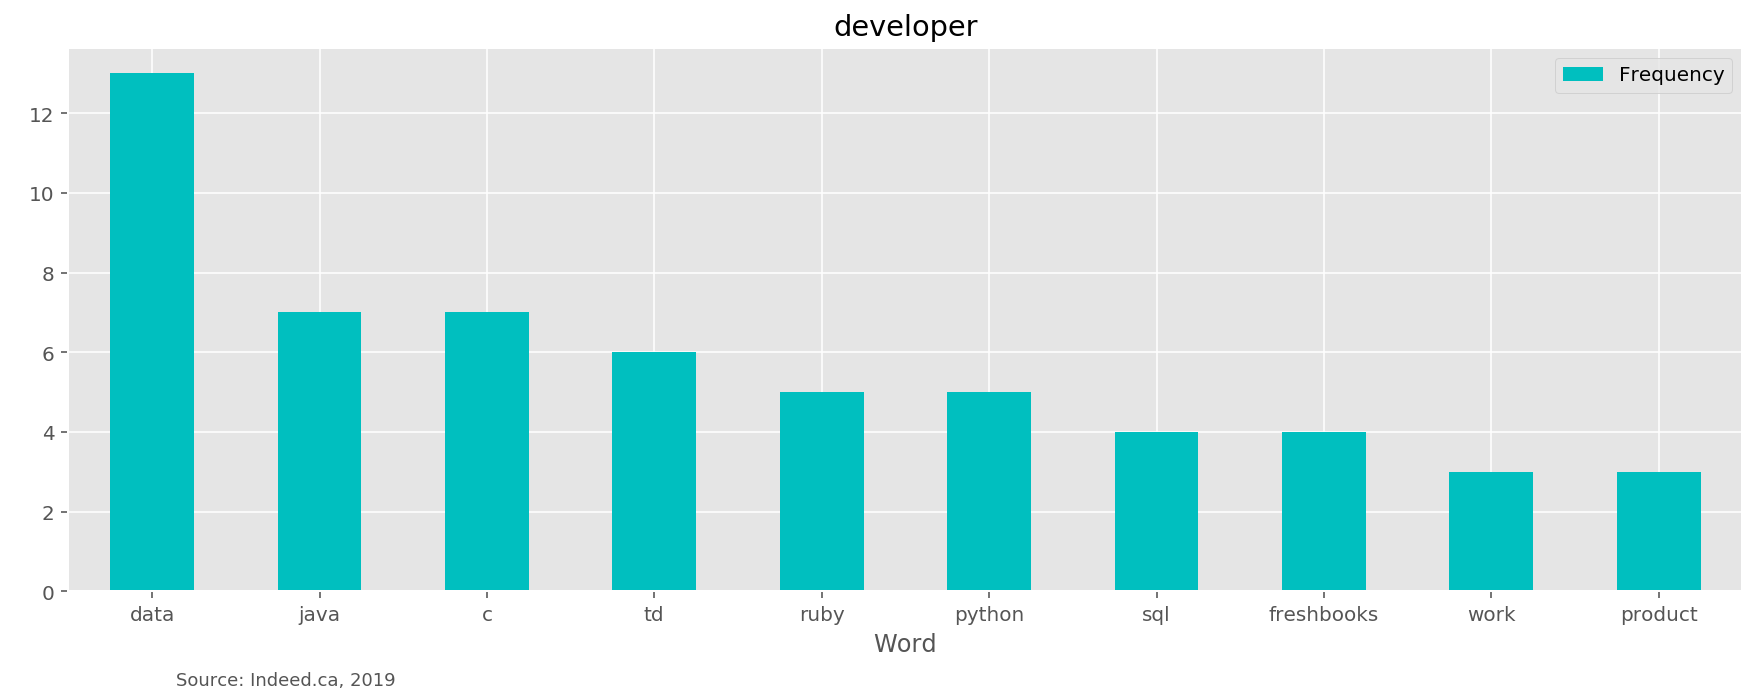

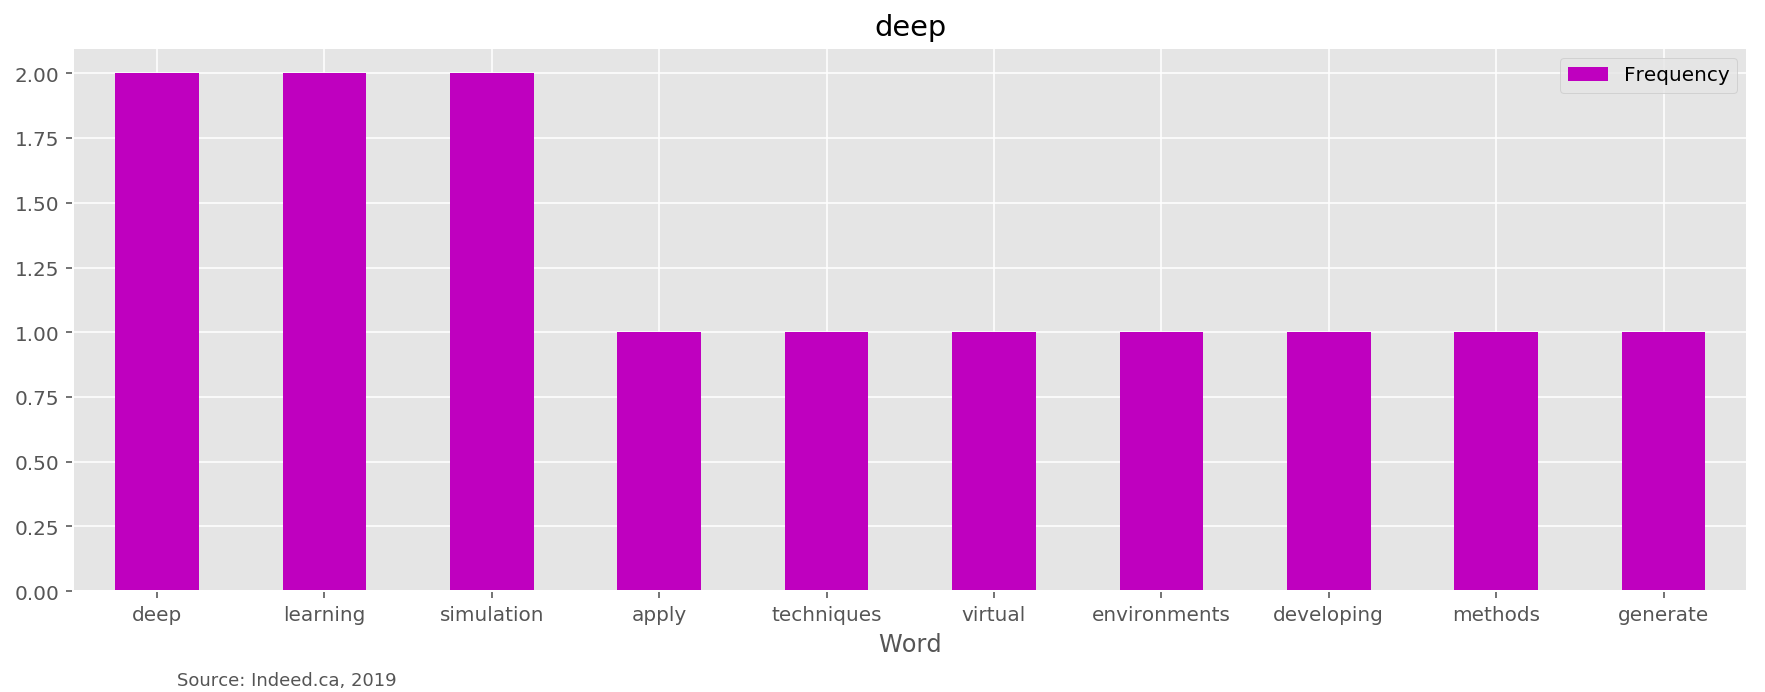

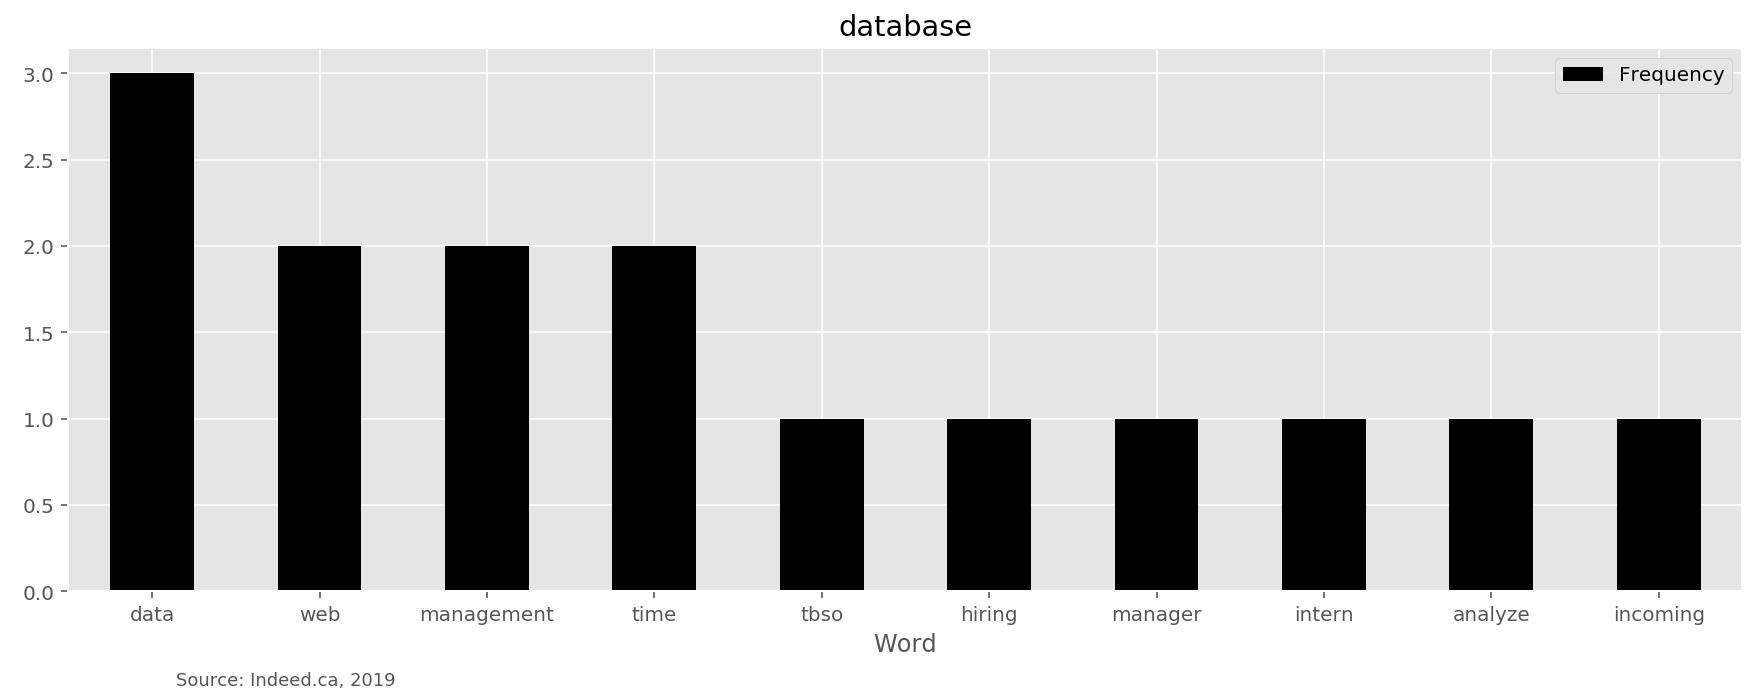

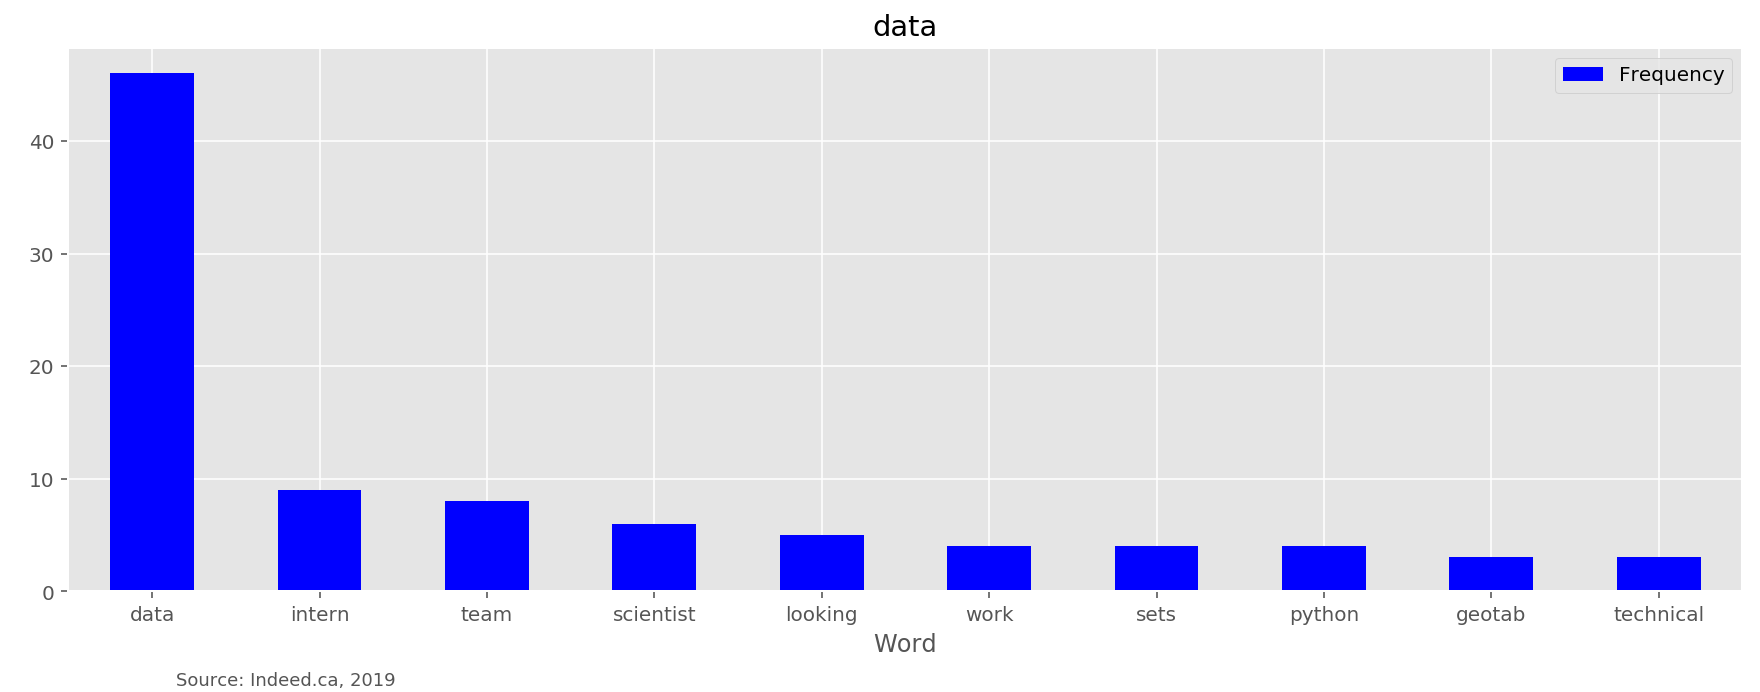

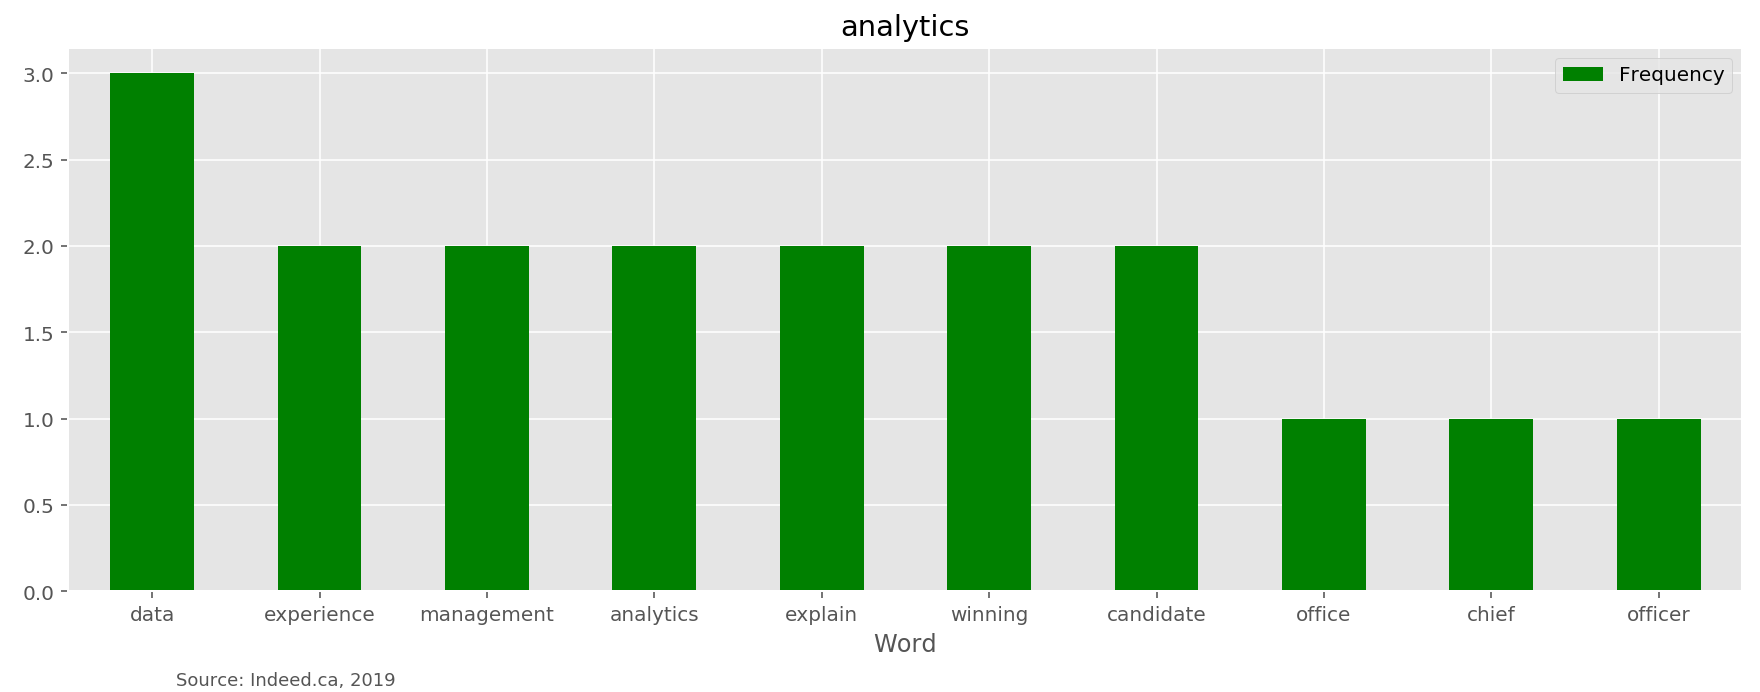

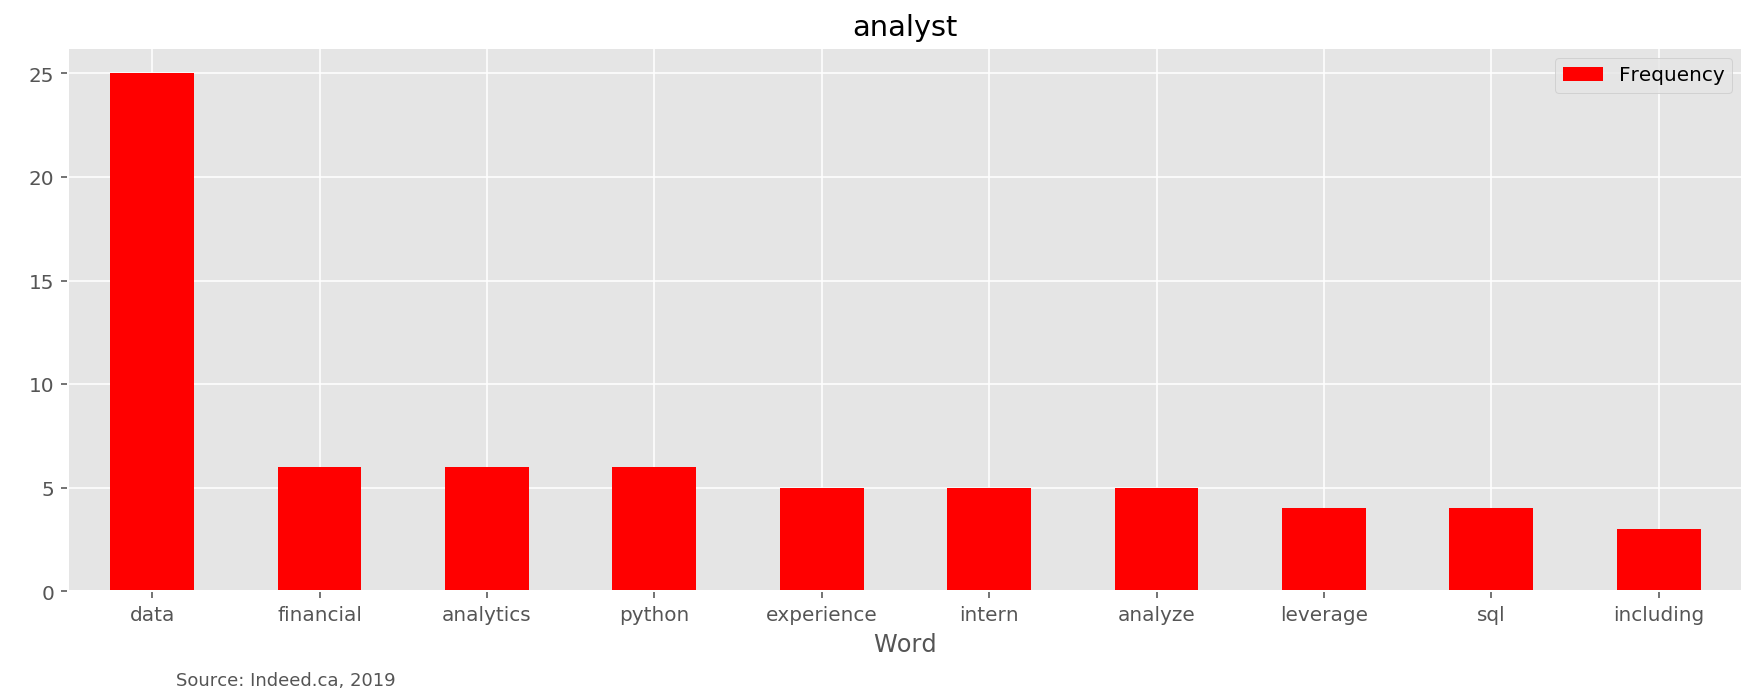

In [64]:
import pandas as pd
import nltk
from collections import Counter

top_N = 10

stopwords = nltk.corpus.stopwords.words('english')
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))

for item in workable_title_vocab:
    s = df2.job_title.str.match(item,case=True)
    df3 = df2[s]
    if df3.empty: #ok this is weird, .match cannot find some of the "keywords" found through vectorizing
        continue #discard if dataframe for keyword is empty
    else:
        df3 = df3.reset_index(drop=True)
        df3.to_csv("test_csvs/" + item + ".csv")
        words = (df3.summary
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
                )
        rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
        plt.style.use('ggplot')
        rslt.plot.bar(rot=0, title=item, color=next(cycol), figsize=(15,5))
        plt.annotate('Source: Indeed.ca, 2019',xy=(0.1, 0.03),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=9, color='#555555')
        plt.savefig('test_csvs/test_pngs/' + item + '.png')
        